## Fake News Classifier Using LSTM

Dataset: https://www.kaggle.com/c/fake-news/data#

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import nltk
import os
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_directory = 'data/'
if not os.path.exists(data_directory):
    !mkdir data/
    !wget https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip --directory-prefix=data/
    !unzip data/News-_dataset.zip -d data/

--2023-07-11 06:00:31--  https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip
Resolving onlineacademiccommunity.uvic.ca (onlineacademiccommunity.uvic.ca)... 142.104.197.46
Connecting to onlineacademiccommunity.uvic.ca (onlineacademiccommunity.uvic.ca)|142.104.197.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43106824 (41M) [application/zip]
Saving to: ‘data/News-_dataset.zip’

News-_dataset.zip   100%[===================>]  41.11M   904KB/s    in 48s     

2023-07-11 06:01:21 (870 KB/s) - ‘data/News-_dataset.zip’ saved [43106824/43106824]

Archive:  data/News-_dataset.zip
  inflating: data/Fake.csv           
  inflating: data/True.csv           


In [ ]:
#df=pd.read_csv('train.csv')

In [ ]:
fake_data = pd.read_csv('data/Fake.csv')
fake_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
true_data = pd.read_csv('data/True.csv')
true_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [ ]:
true_data["label"] = 1
fake_data["label"] = 0

In [ ]:
df = pd.concat([true_data, fake_data], axis=0)

In [ ]:
df['text'] = df['title'] +' '+df['text']
# Either you could data.drop["column names"] or del data["column names"]
del df['title']
del df['subject']
del df['date']


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

text  label
0      Two faces of Maine politics show rifts in stat...      1
1      WHY AMERICANS SHOULD Care That Facebook’s CEO ...      0
2      U.S. Congress members decry 'ethnic cleansing'...      1
3      Syrian army and allies close in on Islamic Sta...      1
4      YALE REMOVES Name Of DEMOCRAT White Supremacis...      0
...                                                  ...    ...
44893  Obama's not-so-secret admirer: Donald Trump WA...      1
44894  DECLASSIFIED US INTEL REPORT Used To Discredit...      0
44895  White House biofuels order would include incen...      1
44896  Trump says 'things will work out fine' between...      1
44897  Data privacy bill in Congress, trans-Atlantic ...      1

[44898 rows x 2 columns]

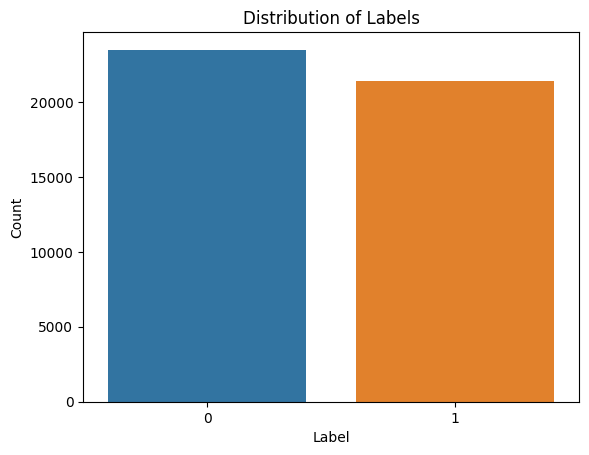

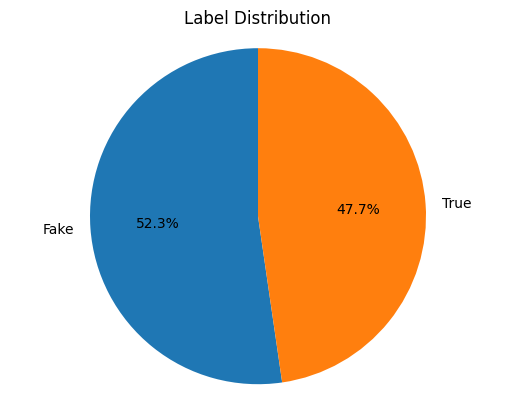

In [ ]:
import seaborn as sns

label_counts = df['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()
label_counts = df['label'].value_counts()

plt.pie(label_counts, labels=['Fake', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution')
plt.axis('equal')
plt.show()


In [ ]:
## Get the Independent Features

X=df.drop('label',axis=1)
## Get the Dependent features
y=df['label']

In [ ]:
X.shape

(44898, 1)

In [ ]:
y.shape

(44898,)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
### Vocabulary size
voc_size=5000

### Onehot Representation

In [ ]:
messages=X.copy()

In [ ]:
messages['text'][1]

'WHY AMERICANS SHOULD Care That Facebook’s CEO Is Threatening Users Against Muslim Refugee “Hate Speech” We are two moms who have put our lives on hold to do everything in our power to fight the progressives on the left from stealing our freedoms and the future of this great nation from our children. Over four years ago, we started the 100 Percent FED Up! Facebook page with the goal of exposing the truth that so many frustrated Americans were not finding in the mainstream media. We ve suffered several cases of censorship by Facebook along the way, but we never gave up. We may disappear after we publish this article, but we ve made a commitment to exposing the truth and we re not going to back down now.It should frighten every person who uses Facebook, that a CEO of a the largest social media platform in the world, has openly expressed the view that America should give up our national security and follow Germany s lead when it comes to open borders for [Muslim] migrants. I suppose it s 

In [ ]:
messages

text
0      Two faces of Maine politics show rifts in stat...
1      WHY AMERICANS SHOULD Care That Facebook’s CEO ...
2      U.S. Congress members decry 'ethnic cleansing'...
3      Syrian army and allies close in on Islamic Sta...
4      YALE REMOVES Name Of DEMOCRAT White Supremacis...
...                                                  ...
44893  Obama's not-so-secret admirer: Donald Trump WA...
44894  DECLASSIFIED US INTEL REPORT Used To Discredit...
44895  White House biofuels order would include incen...
44896  Trump says 'things will work out fine' between...
44897  Data privacy bill in Congress, trans-Atlantic ...

[44898 rows x 1 columns]

In [ ]:
#messages.reset_index(inplace=True)

In [ ]:
messages

text
0      Two faces of Maine politics show rifts in stat...
1      WHY AMERICANS SHOULD Care That Facebook’s CEO ...
2      U.S. Congress members decry 'ethnic cleansing'...
3      Syrian army and allies close in on Islamic Sta...
4      YALE REMOVES Name Of DEMOCRAT White Supremacis...
...                                                  ...
44893  Obama's not-so-secret admirer: Donald Trump WA...
44894  DECLASSIFIED US INTEL REPORT Used To Discredit...
44895  White House biofuels order would include incen...
44896  Trump says 'things will work out fine' between...
44897  Data privacy bill in Congress, trans-Atlantic ...

[44898 rows x 1 columns]

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['two face main polit show rift state republican parti reuter main two promin republican grab headlin week polit move wide differ style substanc insid said could risk parti statur northeastern state u senat susan collin prais democrat say would vote white hous back healthcar reform bill governor paul lepag rev conserv base say readi state govern shutdown legisl agre call budget cut move collin four term moder keep main reput produc independ mind legisl will buck parti leadership washington tradit challeng lepag first ran offic wave populist tea parti support two three way race less major vote see battl heart soul republican parti main said david farmer democrat polit consult work campaign lepag democrat challeng go belliger angri governor lepag go thorough pragmat still conserv senat collin republican lobbyist polit oper lanc dutson larg agre ideolog tip point said dutson work collin reelect campaign percent vote main tradit success third parti candid notabl independ u senat angu king 

In [ ]:
corpus[1]

'american care facebook ceo threaten user muslim refuge hate speech two mom put live hold everyth power fight progress left steal freedom futur great nation children four year ago start percent fed facebook page goal expos truth mani frustrat american find mainstream media suffer sever case censorship facebook along way never gave may disappear publish articl made commit expos truth go back frighten everi person use facebook ceo largest social media platform world openli express view america give nation secur follow germani lead come open border muslim migrant suppos easi billionair surround top secur firm live life far remov everi day american say accept rapist violent invad ye member terror group disguis refuge neighborhood commun live next door mark zuckerberg like never singl encount day day life mark zuckerberg recent admonish worker replac black word obama race war motto black live matter anyon pay attent ask worker essenti accept admonish white group domest terrorist danger prec

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[131,
  2970,
  624,
  560,
  3305,
  472,
  817,
  2,
  2456,
  4959,
  624,
  131,
  3785,
  2,
  2039,
  4632,
  1009,
  560,
  3534,
  2152,
  647,
  1224,
  4158,
  1190,
  2916,
  22,
  2333,
  2456,
  3116,
  1877,
  817,
  3425,
  325,
  79,
  4920,
  4787,
  1241,
  548,
  4263,
  491,
  474,
  121,
  4672,
  3496,
  1938,
  1693,
  3006,
  993,
  1609,
  4348,
  454,
  1498,
  548,
  4113,
  817,
  1657,
  229,
  787,
  1944,
  4033,
  4410,
  1550,
  3534,
  4920,
  884,
  4586,
  946,
  1149,
  624,
  4686,
  4446,
  4580,
  3896,
  787,
  1115,
  4216,
  2456,
  4135,
  2509,
  4390,
  4741,
  1609,
  420,
  1136,
  2230,
  1361,
  1379,
  626,
  2456,
  4766,
  131,
  4519,
  259,
  3006,
  4381,
  3618,
  491,
  1419,
  268,
  1984,
  3106,
  2,
  2456,
  624,
  2916,
  2439,
  3394,
  1241,
  560,
  4870,
  4873,
  2291,
  1609,
  1241,
  4741,
  3573,
  1211,
  3409,
  3006,
  1609,
  3573,
  2793,
  1137,
  2826,
  454,
  325,
  4920,
  2,
  96,
  560,
  1935,
  1837

In [ ]:
corpus[1]

'american care facebook ceo threaten user muslim refuge hate speech two mom put live hold everyth power fight progress left steal freedom futur great nation children four year ago start percent fed facebook page goal expos truth mani frustrat american find mainstream media suffer sever case censorship facebook along way never gave may disappear publish articl made commit expos truth go back frighten everi person use facebook ceo largest social media platform world openli express view america give nation secur follow germani lead come open border muslim migrant suppos easi billionair surround top secur firm live life far remov everi day american say accept rapist violent invad ye member terror group disguis refuge neighborhood commun live next door mark zuckerberg like never singl encount day day life mark zuckerberg recent admonish worker replac black word obama race war motto black live matter anyon pay attent ask worker essenti accept admonish white group domest terrorist danger prec

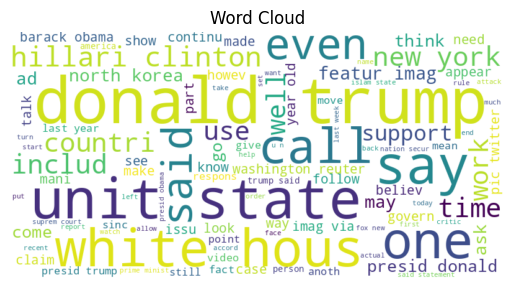

[2941,
 4409,
 3677,
 2933,
 2522,
 1749,
 46,
 588,
 1612,
 1817,
 131,
 4205,
 1448,
 3780,
 4175,
 4083,
 2818,
 2270,
 3420,
 3086,
 1957,
 1431,
 4206,
 1837,
 273,
 4958,
 884,
 151,
 3019,
 194,
 3140,
 2178,
 3677,
 2216,
 146,
 1029,
 3960,
 2768,
 2826,
 2941,
 4990,
 833,
 1516,
 1078,
 996,
 1106,
 1119,
 3677,
 3068,
 259,
 165,
 627,
 4089,
 4601,
 1161,
 1600,
 3186,
 3154,
 1029,
 3960,
 3573,
 4672,
 2311,
 3171,
 445,
 681,
 3677,
 2933,
 3444,
 2472,
 1516,
 389,
 2097,
 2420,
 4960,
 1565,
 3177,
 3561,
 273,
 2426,
 1046,
 796,
 2981,
 3122,
 4182,
 3562,
 46,
 3861,
 1849,
 2101,
 3069,
 1877,
 4388,
 2426,
 337,
 3780,
 3272,
 745,
 2725,
 3171,
 2773,
 2941,
 548,
 2587,
 1856,
 4866,
 1319,
 3552,
 2123,
 2971,
 3834,
 3912,
 588,
 3496,
 4808,
 3780,
 4850,
 1611,
 3374,
 2297,
 4911,
 165,
 4011,
 4354,
 2773,
 2773,
 3272,
 3374,
 2297,
 1182,
 89,
 1110,
 2397,
 1915,
 4055,
 2894,
 3006,
 3983,
 4130,
 1915,
 3780,
 1595,
 684,
 3447,
 716,
 1293,
 1110,
 

In [ ]:
from wordcloud import WordCloud
combined_text = ' '.join(corpus)
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(combined_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

onehot_repr[1]

### Embedding Representation

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[ 624 1241 2456 ... 1115 4015 1657]
 [2534 4873 1657 ... 1524 3992 1565]
 [3552 1996 4873 ... 1786 2855  588]
 ...
 [4957 3228 1786 ... 1931 3746  302]
 [3744 4089 3968 ... 2916 2795 2990]
 [2412  984 1562 ... 4273 4803 2795]]


In [ ]:
embedded_docs[1]

array([2534, 4873, 1657, 1589, 2809,  588, 3645, 1119,  302, 2659, 3094,
       4757,  595, 1560,  628, 4426, 2180, 1524, 3992, 1565], dtype=int32)

In [ ]:
embedded_docs[0]

array([ 624, 1241, 2456, 3079,  970,  734, 3896, 2805, 3427,  977, 1888,
       2198, 2916, 1419,  121,    2, 4881, 1115, 4015, 1657], dtype=int32)

In [ ]:
## Creating model
embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(44898, (44898,))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((44898, 20), (44898,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [ ]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

### Adding Dropout

In [ ]:
# from tensorflow.keras.layers import Dropout
# ## Creating model
# embedding_vector_features=40
# model=Sequential()
# model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
# model.add(Dropout(0.3))
# model.add(LSTM(100))
# model.add(Dropout(0.3))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Performance Metrics And Accuracy

In [ ]:
y_pred=model.predict(X_test)

464/464 [==============================] - 1s 2ms/step


In [ ]:
y_pred=np.where(y_pred > 0.6, 1,0) ##AUC ROC Curve

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[7511,  313],
       [ 386, 6607]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9528244583923872

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7824
           1       0.95      0.94      0.95      6993

    accuracy                           0.95     14817
   macro avg       0.95      0.95      0.95     14817
weighted avg       0.95      0.95      0.95     14817

